In [1]:
import pandas as pd
import numpy as np

In [398]:
textsent = pd.read_csv('./textsent.csv')
textsent.head()

,Unnamed: 0,date,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
0,0,2016-01-01,0.000000,0.000000,0.000000,-0.315247,-0.174879,-0.178399,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2016-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2016-01-03,0.000000,0.000000,0.000000,0.000000,-0.041965,0.059692,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,2016-01-04,0.000000,-0.552873,0.118425,0.567527,0.000000,-0.201569,-0.757216,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,2016-01-05,-0.081609,0.270440,0.032612,-0.033010,-0.122376,-0.360196,0.018746,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [399]:
approval = pd.read_csv('/Users/andyliu/Downloads/trump-approval-ratings 2/approval_topline.csv')

In [400]:
approval.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
0,Donald Trump,Voters,7/17/2020,40.739294,45.024790,36.453797,55.192133,59.723193,50.661073,18:13:56 17 Jul 2020
1,Donald Trump,Adults,7/17/2020,39.566988,43.139093,35.994883,56.265487,60.194595,52.336379,18:11:46 17 Jul 2020
2,Donald Trump,All polls,7/17/2020,40.185953,44.467984,35.903922,55.677787,60.251297,51.104278,18:10:23 17 Jul 2020
3,Donald Trump,Adults,7/16/2020,39.631040,43.337984,35.924097,56.269399,60.367937,52.170861,13:46:09 16 Jul 2020
4,Donald Trump,Voters,7/16/2020,40.943184,45.285427,36.600940,55.005862,59.585702,50.426021,13:47:44 16 Jul 2020


In [401]:
approval_df = approval.loc[approval['subgroup'] == 'All polls']
approval_df.head()

,president,subgroup,modeldate,approve_estimate,approve_hi,approve_lo,disapprove_estimate,disapprove_hi,disapprove_lo,timestamp
2,Donald Trump,All polls,7/17/2020,40.185953,44.467984,35.903922,55.677787,60.251297,51.104278,18:10:23 17 Jul 2020
5,Donald Trump,All polls,7/16/2020,40.337064,44.703125,35.971004,55.579876,60.257302,50.902450,13:45:02 16 Jul 2020
8,Donald Trump,All polls,7/15/2020,40.311810,44.653608,35.970012,55.620666,60.275325,50.966008,17:17:02 15 Jul 2020
9,Donald Trump,All polls,7/14/2020,40.311076,44.401879,36.220273,55.205477,59.973027,50.437928,19:02:02 14 Jul 2020
14,Donald Trump,All polls,7/13/2020,40.442940,44.451422,36.434457,55.169294,59.908563,50.430025,16:47:00 13 Jul 2020


In [415]:
approval_df = approval_df[['modeldate', 'approve_estimate']]
approval_df.head()

,modeldate,approve_estimate
3813,2017-01-23,45.46693
3812,2017-01-24,45.44264
3808,2017-01-25,47.76497
3805,2017-01-26,44.37598
3802,2017-01-27,44.13586


In [416]:
approval_df['approve_estimate'] = approval_df['approve_estimate'].astype('float64')
approval_df['modeldate'] = pd.to_datetime(approval_df['modeldate'])

In [417]:
approval_df = approval_df.sort_values(ascending=True, by=['modeldate'])
approval_df.head()

,modeldate,approve_estimate
3813,2017-01-23,45.46693
3812,2017-01-24,45.44264
3808,2017-01-25,47.76497
3805,2017-01-26,44.37598
3802,2017-01-27,44.13586


In [418]:
textsent_df = textsent.iloc[22:,:]
textsent_df.head()

,Unnamed: 0,date,0,1,2,3,4,5,6,7,...,90,91,92,93,94,95,96,97,98,99
22,22,2016-01-23,0.000000,0.000000,0.000000,0.000000,0.018309,0.146931,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,23,2016-01-24,0.000000,0.505255,0.000000,0.467812,0.902088,0.348435,-0.104437,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,24,2016-01-25,0.000000,-0.069621,0.243343,-0.110215,0.000000,1.134737,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,25,2016-01-26,0.000000,0.387676,0.000000,0.359927,0.186877,0.061621,0.180408,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,26,2016-01-27,-0.528729,-0.480155,-0.114941,0.069708,0.000000,-0.246252,-0.047342,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [419]:
textsent_df = textsent_df.drop('Unnamed: 0', axis=1)

In [420]:
from datetime import datetime, date

In [421]:
approval_df['modeldate'] = pd.Series(approval_df['modeldate']).astype('datetime64[ms]')

In [422]:
better = []
for i in list(approval_df['modeldate']):
    d = datetime.strptime(str(i)[:10], '%Y-%m-%d').date()
    better.append(d)
approval_df['modeldate'] = better
approval_df.head()

,modeldate,approve_estimate
3813,2017-01-23,45.46693
3812,2017-01-24,45.44264
3808,2017-01-25,47.76497
3805,2017-01-26,44.37598
3802,2017-01-27,44.13586


In [423]:
good = []
for i in list(textsent_df['date']):
    d = datetime.strptime(i, '%Y-%m-%d').date()
    good.append(d)
textsent_df['date'] = good
textsent_df.head()

,date,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
22,2016-01-23,0.000000,0.000000,0.000000,0.000000,0.018309,0.146931,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,2016-01-24,0.000000,0.505255,0.000000,0.467812,0.902088,0.348435,-0.104437,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,2016-01-25,0.000000,-0.069621,0.243343,-0.110215,0.000000,1.134737,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25,2016-01-26,0.000000,0.387676,0.000000,0.359927,0.186877,0.061621,0.180408,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,2016-01-27,-0.528729,-0.480155,-0.114941,0.069708,0.000000,-0.246252,-0.047342,0.0,-0.031061,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [424]:
shared_dates = []
l = list(approval_df['modeldate'])
for d in list(textsent_df['date']):
    if d in l:
        shared_dates.append(d)
print(len(shared_dates))

915


In [425]:
shared_textsent_df = textsent_df.loc[textsent_df['date'].isin(shared_dates)]
shared_approval_df = approval_df.loc[approval_df['modeldate'].isin(shared_dates)]

In [426]:
shared_approval_df = shared_approval_df.rename(columns={'modeldate':'date'})
shared_approval_df.head()

,date,approve_estimate
3813,2017-01-23,45.46693
3812,2017-01-24,45.44264
3808,2017-01-25,47.76497
3805,2017-01-26,44.37598
3802,2017-01-27,44.13586


In [427]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

In [428]:
dfTest = shared_textsent_df.copy(deep=True)
cols = dfTest.columns
cols = cols[1:]
dfTest[cols] = scaler.fit_transform(dfTest[cols])

In [429]:
shared_textsent_df = dfTest
shared_textsent_df.head()

,date,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
388,2017-01-23,0.089063,0.980872,0.041347,0.986340,0.940858,0.939670,0.987970,0.990515,0.782055,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
389,2017-01-24,0.095025,0.975956,0.031997,0.984272,0.909069,0.958263,0.989869,0.989254,0.838313,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
390,2017-01-25,0.158042,0.981104,0.044683,0.984482,0.891815,0.897951,0.989060,0.988754,0.805370,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
391,2017-01-26,0.074485,0.976205,0.042074,0.978763,0.933962,0.971763,0.987524,0.988719,0.795095,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
392,2017-01-27,0.089714,0.981857,0.046552,0.980313,0.858760,0.934564,0.989680,0.986246,0.748545,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [430]:
from sklearn.decomposition import PCA

In [431]:
shared_textsent_nodate = shared_textsent_df.drop('date', axis=1)
shared_textsent_nodate.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
388,0.089063,0.980872,0.041347,0.986340,0.940858,0.939670,0.987970,0.990515,0.782055,0.982423,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
389,0.095025,0.975956,0.031997,0.984272,0.909069,0.958263,0.989869,0.989254,0.838313,0.983827,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
390,0.158042,0.981104,0.044683,0.984482,0.891815,0.897951,0.989060,0.988754,0.805370,0.991431,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
391,0.074485,0.976205,0.042074,0.978763,0.933962,0.971763,0.987524,0.988719,0.795095,0.989850,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0
392,0.089714,0.981857,0.046552,0.980313,0.858760,0.934564,0.989680,0.986246,0.748545,0.981320,...,0.826759,0.0,0.873067,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [432]:
#split into training, test sets
n_train = 732
train = shared_textsent_nodate[:n_train]
train.shape

(732, 100)

In [456]:
pca = PCA(n_components = 0.95)
pca.fit(train)
train_X = pca.transform(train)

In [434]:
approval = shared_approval_df['approve_estimate']
approval = pd.Index.to_numpy(approval)
len(approval)

915

In [435]:
test_X = shared_textsent_nodate[n_train:]

In [439]:
exp_X_train=train_X
exp_X_test=test_X
print(exp_X_train.shape, exp_X_test.shape)

(732, 18) (183, 100)


In [444]:
exp_X_train = np.array(exp_X_train)
exp_X_test = np.array(exp_X_test)

In [322]:
np.savetxt('xtrain.csv', exp_X_train, delimiter=',')

In [323]:
np.savetxt('ytrain.csv', exp_y_train, delimiter=',')

In [445]:
exp_y_train=approval[:n_train]
exp_y_test=approval[n_train:]
print(exp_y_train.shape, exp_y_test.shape)

(732,) (183,)


In [441]:
#exp_y_train=exp_y_train[:10]
#exp_X_train=exp_X_train[:10]
exp_X_test = exp_X_test[1:]
exp_X_test.shape

(182, 100)

In [442]:
#reshape everything

In [454]:
X_train= exp_X_train.reshape((exp_X_train.shape[0],1,exp_X_train.shape[1]))
X_test=exp_X_test.reshape((exp_X_test.shape[0],1,exp_X_test.shape[1]))
y_train=exp_y_train
y_test=exp_y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(732, 1, 18) (182, 1, 100) (732,) (183,)


In [447]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

In [496]:
model = Sequential()
model.add(LSTM(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Epoch 1/1000
732/732 [==============================] - 1s 1ms/step - loss: 1642.7654
Epoch 2/1000
732/732 [==============================] - 0s 175us/step - loss: 1636.6646
Epoch 3/1000
732/732 [==============================] - 0s 95us/step - loss: 1629.0192
Epoch 4/1000
732/732 [==============================] - 0s 138us/step - loss: 1619.3683
Epoch 5/1000
732/732 [==============================] - 0s 76us/step - loss: 1607.1277
Epoch 6/1000
732/732 [==============================] - 0s 78us/step - loss: 1591.6259
Epoch 7/1000
732/732 [==============================] - 0s 88us/step - loss: 1572.0002
Epoch 8/1000
732/732 [==============================] - 0s 95us/step - loss: 1547.4603
Epoch 9/1000
732/732 [==============================] - 0s 78us/step - loss: 1517.0375
Epoch 10/1000
732/732 [==============================] - 0s 76us/step - loss: 1479.6203
Epoch 11/1000
732/732 [==============================] - 0s 77us/step - loss: 1434.1404
Epoch 12/1000
732/732 [=================

732/732 [==============================] - 0s 42us/step - loss: 3.9648
Epoch 192/1000
732/732 [==============================] - 0s 43us/step - loss: 3.9645
Epoch 193/1000
732/732 [==============================] - 0s 42us/step - loss: 3.9642
Epoch 194/1000
732/732 [==============================] - 0s 41us/step - loss: 3.9638
Epoch 195/1000
732/732 [==============================] - 0s 45us/step - loss: 3.9635
Epoch 196/1000
732/732 [==============================] - 0s 48us/step - loss: 3.9632
Epoch 197/1000
732/732 [==============================] - 0s 50us/step - loss: 3.9629
Epoch 198/1000
732/732 [==============================] - 0s 43us/step - loss: 3.9626
Epoch 199/1000
732/732 [==============================] - 0s 43us/step - loss: 3.9622
Epoch 200/1000
732/732 [==============================] - 0s 115us/step - loss: 3.9618
Epoch 201/1000
732/732 [==============================] - 0s 82us/step - loss: 3.9615
Epoch 202/1000
732/732 [==============================] - 0s 52us/st

732/732 [==============================] - 0s 94us/step - loss: 3.7440
Epoch 382/1000
732/732 [==============================] - 0s 84us/step - loss: 3.7423
Epoch 383/1000
732/732 [==============================] - 0s 67us/step - loss: 3.7416
Epoch 384/1000
732/732 [==============================] - 0s 82us/step - loss: 3.7400
Epoch 385/1000
732/732 [==============================] - 0s 73us/step - loss: 3.7392
Epoch 386/1000
732/732 [==============================] - 0s 71us/step - loss: 3.7375
Epoch 387/1000
732/732 [==============================] - 0s 59us/step - loss: 3.7369
Epoch 388/1000
732/732 [==============================] - 0s 51us/step - loss: 3.7351
Epoch 389/1000
732/732 [==============================] - 0s 56us/step - loss: 3.7343
Epoch 390/1000
732/732 [==============================] - 0s 56us/step - loss: 3.7328
Epoch 391/1000
732/732 [==============================] - 0s 65us/step - loss: 3.7321
Epoch 392/1000
732/732 [==============================] - 0s 65us/ste

732/732 [==============================] - 0s 67us/step - loss: 3.6737
Epoch 477/1000
732/732 [==============================] - 0s 91us/step - loss: 3.6733
Epoch 478/1000
732/732 [==============================] - 0s 69us/step - loss: 3.6728
Epoch 479/1000
732/732 [==============================] - 0s 108us/step - loss: 3.6725
Epoch 480/1000
732/732 [==============================] - 0s 97us/step - loss: 3.6721
Epoch 481/1000
732/732 [==============================] - 0s 61us/step - loss: 3.6716
Epoch 482/1000
732/732 [==============================] - 0s 56us/step - loss: 3.6713
Epoch 483/1000
732/732 [==============================] - 0s 59us/step - loss: 3.6708
Epoch 484/1000
732/732 [==============================] - 0s 49us/step - loss: 3.6702
Epoch 485/1000
732/732 [==============================] - 0s 62us/step - loss: 3.6700
Epoch 486/1000
732/732 [==============================] - 0s 59us/step - loss: 3.6695
Epoch 487/1000
732/732 [==============================] - 0s 58us/st

732/732 [==============================] - 0s 55us/step - loss: 3.6118
Epoch 667/1000
732/732 [==============================] - 0s 49us/step - loss: 3.6117
Epoch 668/1000
732/732 [==============================] - 0s 50us/step - loss: 3.6113
Epoch 669/1000
732/732 [==============================] - 0s 52us/step - loss: 3.6111
Epoch 670/1000
732/732 [==============================] - 0s 54us/step - loss: 3.6107
Epoch 671/1000
732/732 [==============================] - 0s 53us/step - loss: 3.6105
Epoch 672/1000
732/732 [==============================] - 0s 71us/step - loss: 3.6100
Epoch 673/1000
732/732 [==============================] - 0s 126us/step - loss: 3.6100
Epoch 674/1000
732/732 [==============================] - 0s 69us/step - loss: 3.6094
Epoch 675/1000
732/732 [==============================] - 0s 58us/step - loss: 3.6094
Epoch 676/1000
732/732 [==============================] - 0s 69us/step - loss: 3.6088
Epoch 677/1000
732/732 [==============================] - 0s 54us/st

732/732 [==============================] - 0s 45us/step - loss: 3.5859
Epoch 762/1000
732/732 [==============================] - 0s 47us/step - loss: 3.5853
Epoch 763/1000
732/732 [==============================] - 0s 50us/step - loss: 3.5854
Epoch 764/1000
732/732 [==============================] - 0s 49us/step - loss: 3.5848
Epoch 765/1000
732/732 [==============================] - 0s 55us/step - loss: 3.5850
Epoch 766/1000
732/732 [==============================] - 0s 45us/step - loss: 3.5843
Epoch 767/1000
732/732 [==============================] - 0s 41us/step - loss: 3.5847
Epoch 768/1000
732/732 [==============================] - 0s 48us/step - loss: 3.5839
Epoch 769/1000
732/732 [==============================] - 0s 61us/step - loss: 3.5842
Epoch 770/1000
732/732 [==============================] - 0s 53us/step - loss: 3.5835
Epoch 771/1000
732/732 [==============================] - 0s 60us/step - loss: 3.5837
Epoch 772/1000
732/732 [==============================] - 0s 55us/ste

732/732 [==============================] - 0s 38us/step - loss: 3.5304
Epoch 952/1000
732/732 [==============================] - 0s 53us/step - loss: 3.5300
Epoch 953/1000
732/732 [==============================] - 0s 46us/step - loss: 3.5297
Epoch 954/1000
732/732 [==============================] - 0s 46us/step - loss: 3.5295
Epoch 955/1000
732/732 [==============================] - 0s 43us/step - loss: 3.5290
Epoch 956/1000
732/732 [==============================] - 0s 44us/step - loss: 3.5287
Epoch 957/1000
732/732 [==============================] - 0s 65us/step - loss: 3.5285
Epoch 958/1000
732/732 [==============================] - 0s 60us/step - loss: 3.5281
Epoch 959/1000
732/732 [==============================] - 0s 62us/step - loss: 3.5277
Epoch 960/1000
732/732 [==============================] - 0s 50us/step - loss: 3.5275
Epoch 961/1000
732/732 [==============================] - 0s 40us/step - loss: 3.5272
Epoch 962/1000
732/732 [==============================] - 0s 42us/ste

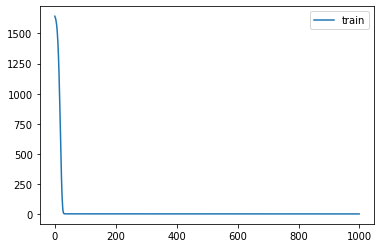

In [497]:
history=model.fit(X_train,y_train, epochs=1000, shuffle=False,batch_size=60, verbose=1)
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

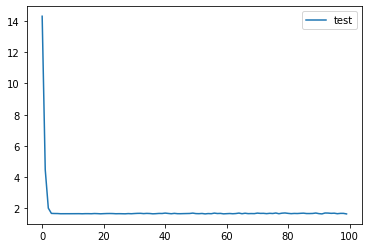

<Figure size 432x288 with 0 Axes>

In [508]:
plt.plot(model_fit.history['rmse'], label='test')
#plt.plot(history.history['rmse'], label='test')

plt.legend()
plt.show()
plt.savefig('./rmse.png')

In [500]:
X_test = pca.transform(exp_X_test)
X_test=X_test.reshape((X_test.shape[0],1,X_test.shape[1]))
#pred=model.predict(X_test)
pred=model.predict(X_test)
actual = y_test

In [501]:
actual = actual[1:]

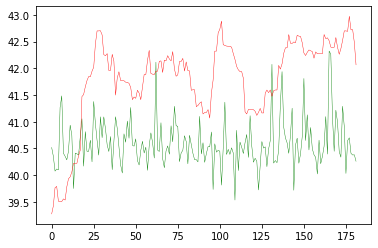

<Figure size 432x288 with 0 Axes>

In [509]:
plt.plot(pred, color='green',linewidth=0.4)
plt.plot(actual, color='red', linewidth=0.4)
plt.show()
plt.savefig('./predicted_approval.png')

In [503]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(actual, pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(actual, pred)
print("mse, rmse, mae:" + str((mse,rmse,mae)))

mse, rmse, mae:(2.175206054976559, 1.4748579779004347, 1.3404162847162602)


In [467]:
print(pred)

[[40.47578 ]
 [40.52398 ]
 [40.318317]
 [40.084145]
 [39.97562 ]
 [40.98826 ]
 [40.95749 ]
 [40.36186 ]
 [40.65674 ]
 [40.85865 ]
 [40.71441 ]
 [41.104122]
 [40.89429 ]
 [39.810066]
 [40.89051 ]
 [40.495605]
 [40.547516]
 [40.616364]
 [40.954365]
 [40.297165]
 [39.94818 ]
 [40.42135 ]
 [40.58116 ]
 [40.63067 ]
 [40.86137 ]
 [40.325573]
 [40.394558]
 [40.521633]
 [40.568115]
 [40.645912]
 [41.017754]
 [40.136776]
 [40.068153]
 [40.40438 ]
 [40.59469 ]
 [40.45468 ]
 [40.1045  ]
 [40.742214]
 [40.890663]
 [40.382965]
 [40.20349 ]
 [40.52389 ]
 [40.288765]
 [40.552982]
 [40.80665 ]
 [40.674175]
 [39.903378]
 [40.35226 ]
 [40.955612]
 [40.615047]
 [41.011818]
 [40.416367]
 [39.9538  ]
 [40.510574]
 [40.39502 ]
 [40.193977]
 [40.459953]
 [40.192528]
 [39.49016 ]
 [40.695824]
 [40.529198]
 [40.506554]
 [41.25645 ]
 [40.651794]
 [40.52861 ]
 [41.18708 ]
 [40.40169 ]
 [40.299328]
 [40.640656]
 [40.81558 ]
 [40.52309 ]
 [41.021824]
 [40.80976 ]
 [40.657467]
 [41.24801 ]
 [41.20042 ]
 [40.107243]